# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

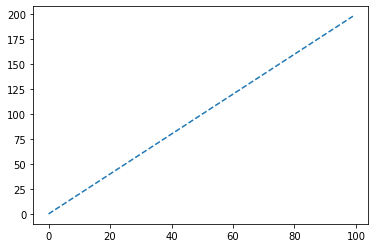

In [3]:
# Method 1
%matplotlib inline
plt.plot(x, y, '--');

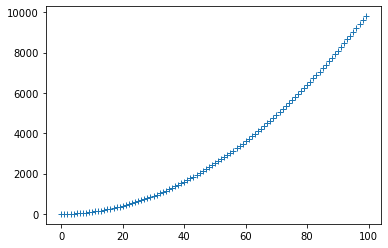

In [4]:
plt.plot(x, z, '+');

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

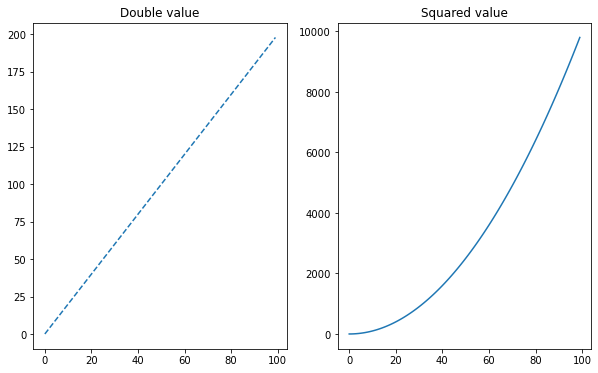

In [5]:
# Method 2
%matplotlib inline
fig, ax = plt.subplots(nrows=1,ncols=2, figsize =(10,6))
ax[0].set_title('Double value')
ax[0].plot(x, y, '--')
ax[1].set_title('Squared value')
ax[1].plot(x, z);

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

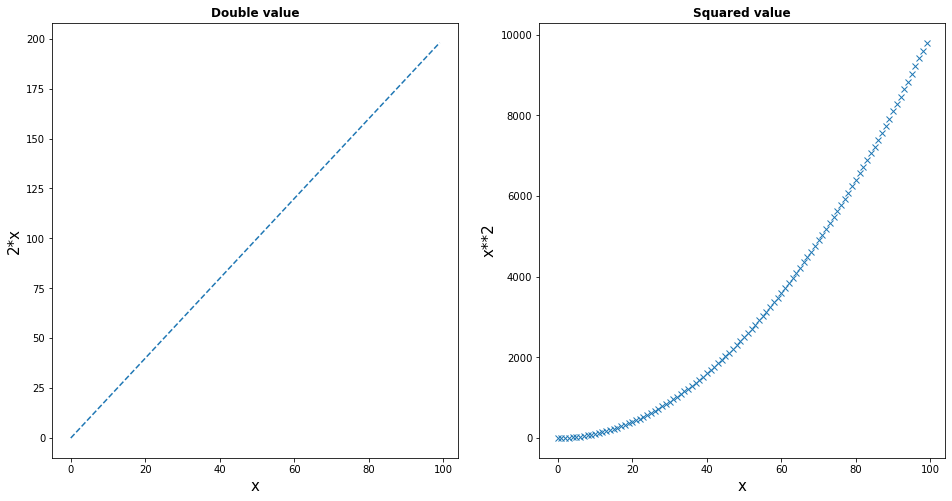

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize = (16, 8))
ax[0].set_title('Double value', fontweight='bold')
ax[0].plot(x, y, '--')
ax[0].set_xlabel('x', fontsize=15)
ax[0].set_ylabel('2*x', fontsize=15)
ax[1].set_title('Squared value',fontweight='bold')
ax[1].plot(x, z, 'x')
ax[1].set_xlabel('x', fontsize=15)
ax[1].set_ylabel('x**2', fontsize=15);

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

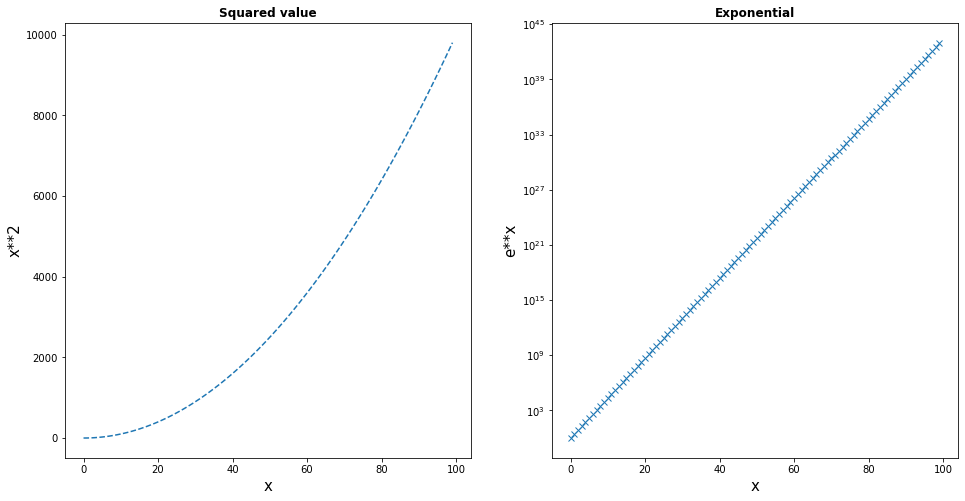

In [7]:
x = np.arange(0,100)
y = x**2
z = np.exp(x)
fig, ax = plt.subplots(nrows=1,ncols=2, figsize = (16, 8))
ax[0].set_title('Squared value', fontweight='bold')
ax[0].plot(x, y, '--')
ax[0].set_xlabel('x', fontsize=15)
ax[0].set_ylabel('x**2', fontsize=15)
ax[1].set_title('Exponential',fontweight='bold')
ax[1].plot(x, z, 'x')
ax[1].set_xlabel('x', fontsize=15)
ax[1].set_ylabel('e**x', fontsize=15);
ax[1].set_yscale('log')

#### As a bonus challenge, try to add a legend to the plot.

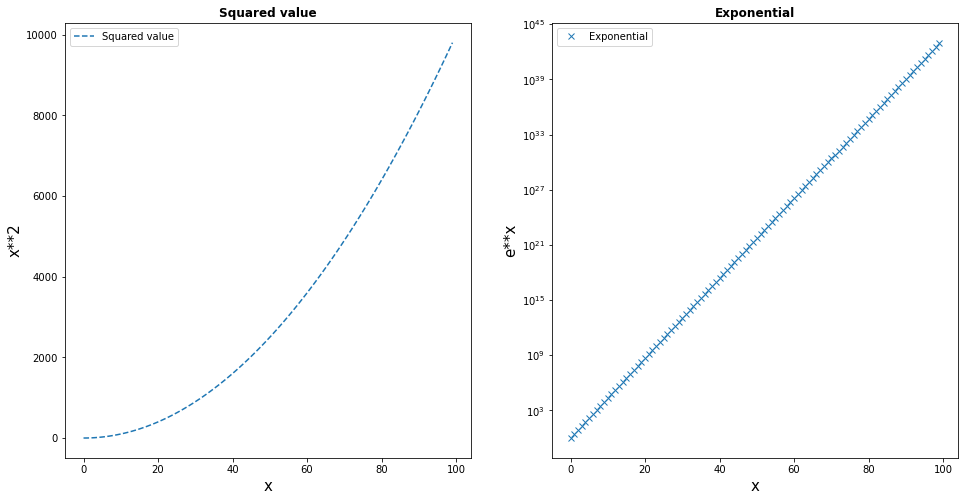

In [8]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize = (16, 8))
ax[0].set_title('Squared value', fontweight='bold')
ax[0].plot(x, y, '--', label = 'Squared value')
ax[0].set_xlabel('x', fontsize=15)
ax[0].set_ylabel('x**2', fontsize=15)
ax[0].legend()
ax[1].set_title('Exponential',fontweight='bold')
ax[1].plot(x, z, 'x', label = 'Exponential')
ax[1].set_xlabel('x', fontsize=15)
ax[1].set_ylabel('e**x', fontsize=15)
ax[1].set_yscale('log')
ax[1].legend();

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
fitbit = pd.read_csv('../data/fitbit2.csv')
display(fitbit.head())

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

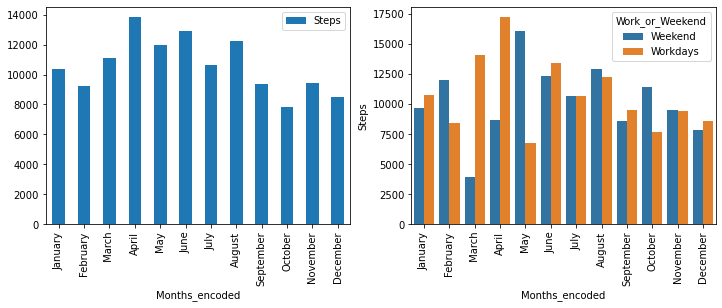

In [10]:
# MEDIAN STEPS BY MONTH_ENCODED

#The data represents the 365 days of a year but starting from 8 of may, it can be divided by months with month_encoded column
fitbit_sorted = fitbit.sort_values(by = ['Months_encoded'])
median_steps = fitbit[['Steps', 'Months_encoded']].groupby(['Months_encoded']).agg('median')
#display(median_steps)


# MEDIAN STEPS BY WORK_OR_WEEKEND
#In column 'Week_or_Weekend' 1 = Week and 0 = Weekend

def working_status(column_pos):
    if column_pos == 0:
        return 'Weekend'
    else:
        return 'Workdays'

fitbit_sorted['Work_or_Weekend'] = fitbit_sorted['Work_or_Weekend'].apply(working_status)

w_or_w_steps = fitbit_sorted[['Steps', 'Months_encoded', 'Work_or_Weekend']].groupby(['Months_encoded','Work_or_Weekend'], as_index = False).agg('median')
#display(w_or_w_steps)


year =['January', 'February', ' March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


#PLOT
fig = plt.figure(figsize=(12, 4))

ax1 = plt.subplot2grid((1, 2), (0, 0))
ax2 = plt.subplot2grid((1, 2), (0, 1))


median_steps.plot(kind = 'bar', ax = ax1)
plt.sca(ax1)
plt.xticks(range(12), year, rotation ='vertical')
#w_or_w_steps.plot(kind = 'bar', color=["SkyBlue","IndianRed"], ax = ax2)
sns.barplot(data= w_or_w_steps, x= 'Months_encoded', y= 'Steps', hue= 'Work_or_Weekend', ax = ax2)
plt.sca(ax2)
plt.xticks(range(12), year, rotation ='vertical');

fig.savefig('../figures/graph_challenge2.png')


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

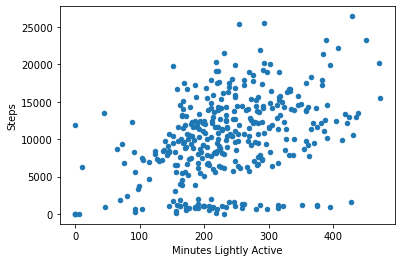

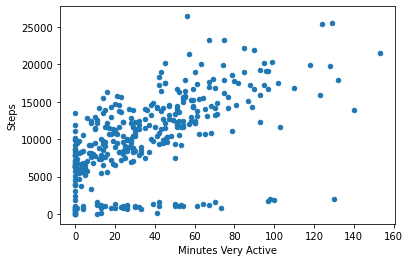

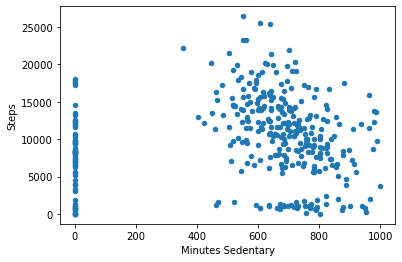

In [11]:
variables = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
for col in variables:
    fitbit.plot(kind = 'scatter', x = col, y = 'Steps')


## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [12]:
titanic = pd.read_csv('../data/titanic.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [13]:
print(titanic.dtypes)

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [14]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include =(int, float)).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [15]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include =(object)).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

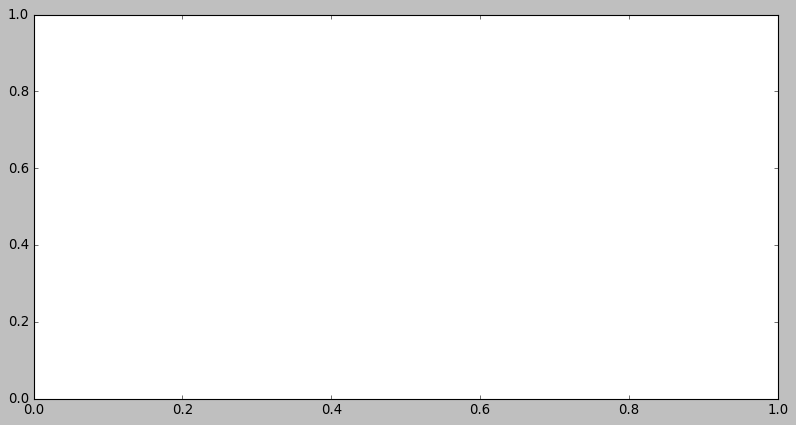

In [16]:
plt.style.use('classic')
fig, ax = plt.subplots(figsize = (12, 6))

#### Use the right visulalization to show the distribution of column `Age`.

In [17]:
titanic = titanic.astype({'Age': int})
print(titanic.dtypes)
print(titanic['Age'].max())
print(titanic['Age'].min())

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
80
0


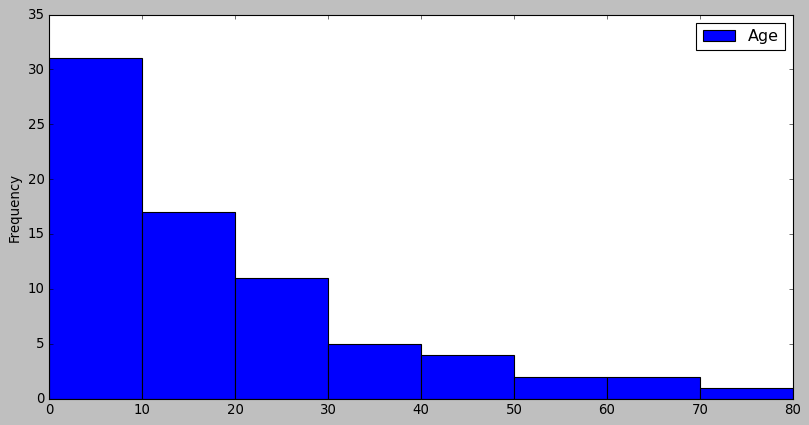

In [18]:
fig, ax = plt.subplots(figsize = (12, 6))
tit_ages = titanic[['Name', 'Age']].groupby(['Age']).agg('count')
#display(tit_ages)
tit_ages.plot(kind = 'hist', bins = range(0, 90, 10), ax = ax)
ax.legend(['Age']);


#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

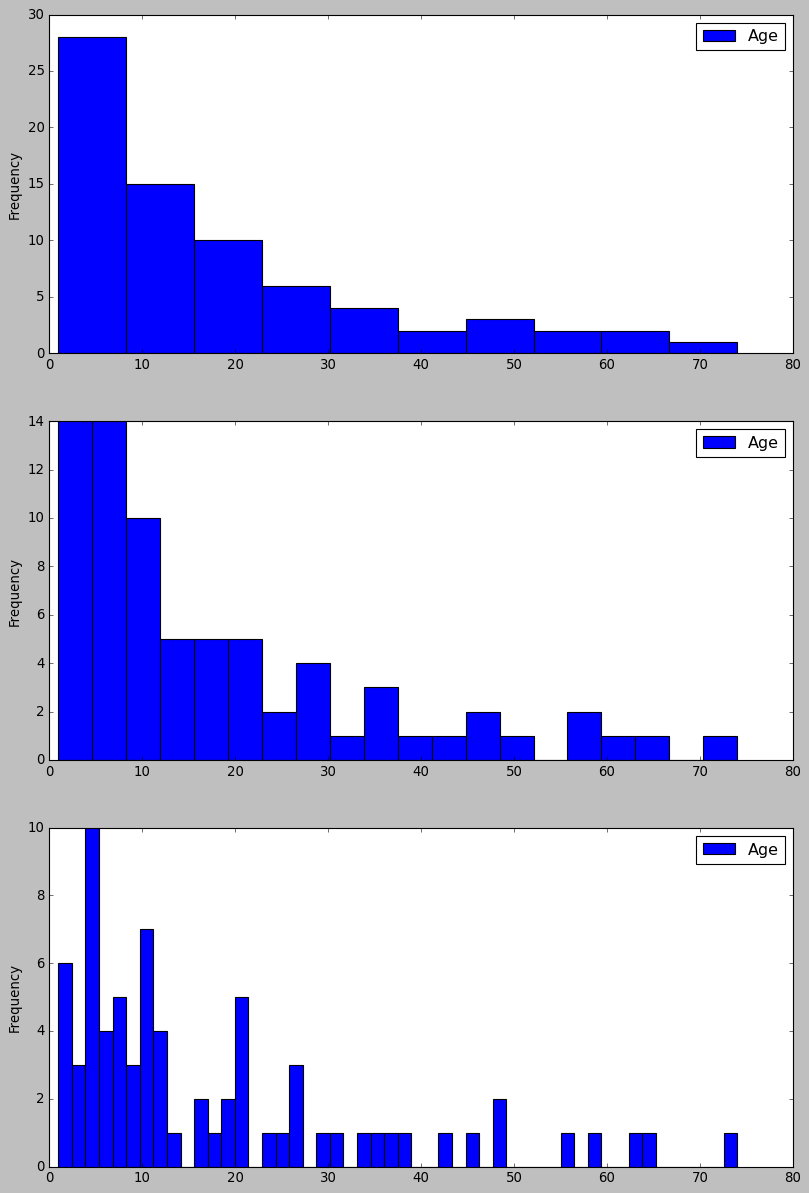

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(12, 18))
tit_ages.plot(kind = 'hist', bins = 10, ax = ax[0], legend = 'Age')
ax[0].legend(['Age'])
tit_ages.plot(kind = 'hist', bins = 20, ax = ax[1], legend = 'Age')
ax[1].legend(['Age'])
tit_ages.plot(kind = 'hist', bins = 50, ax = ax[2], legend = 'Age')
ax[2].legend(['Age'])
plt.show();

#### How does the bin size affect your plot?

In [22]:
"""
It changes a lot the graph, the perspective of the results is different. 
With less bins it could be seen a tendency, wiht more beens it could be seen the data distribution.
"""

'\nIt changes a lot the graph, the perspective of the results is different. \nWith less bins it could be seen a tendency, wiht more beens it could be seen the data distribution.\n'

#### Use seaborn to show the distribution of column `Age`.

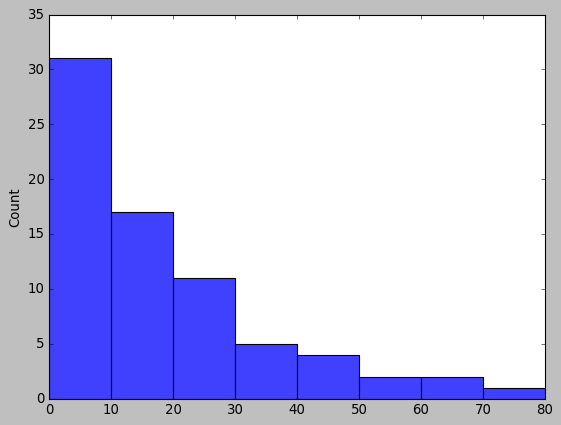

In [20]:
sns.histplot(tit_ages, bins= range(0, 90, 10), legend = False);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

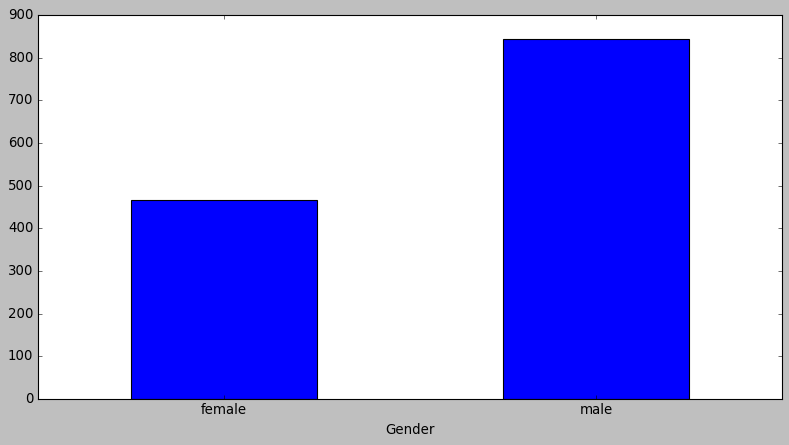

In [21]:
# Method 1 - matplotlib
fig, ax = plt.subplots(figsize = (12, 6))
tit_gender = titanic[['Name', 'Gender']].groupby(['Gender']).agg('count')
tit_gender.plot(kind = 'bar', ax = ax,  legend=False)
plt.xticks(rotation ='horizontal');

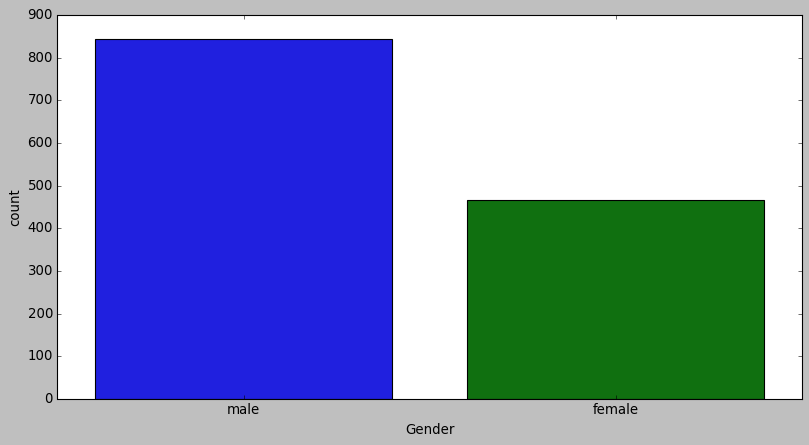

In [22]:
# Method 2 - seaborn
fig, ax = plt.subplots(figsize = (12, 6))
ax = sns.countplot(x = 'Gender', data=titanic);

#### Use the right plot to visualize the column `Pclass`.

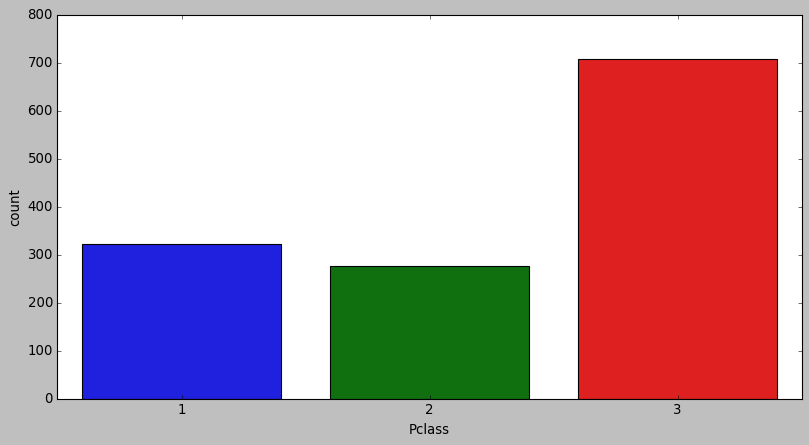

In [23]:
fig, ax = plt.subplots(figsize = (12, 6))
ax = sns.countplot(x = 'Pclass', data = titanic);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

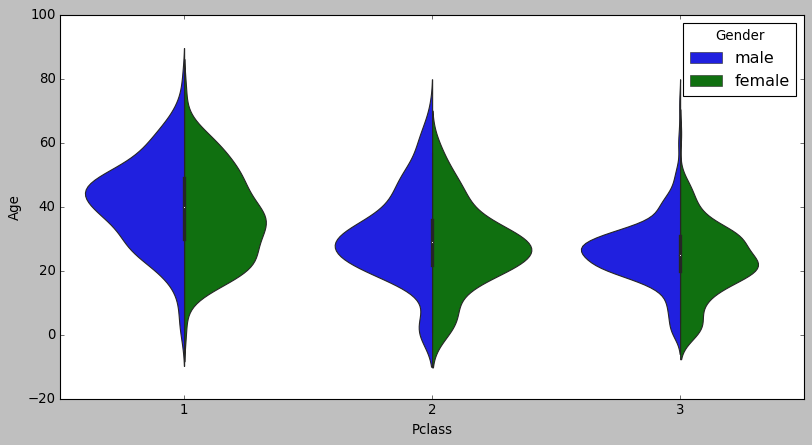

In [24]:
fig, ax = plt.subplots(figsize = (12, 6))
ax = sns.violinplot(data=titanic, x='Pclass', y='Age', hue='Gender', split=True)

In [ ]:
"""
I have choosen a violin plot to view the three variables (Age, gender and class) at the same time.
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
The first class have a higher age than the rest of classes, and in class 1 and 3 there are more men than women.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

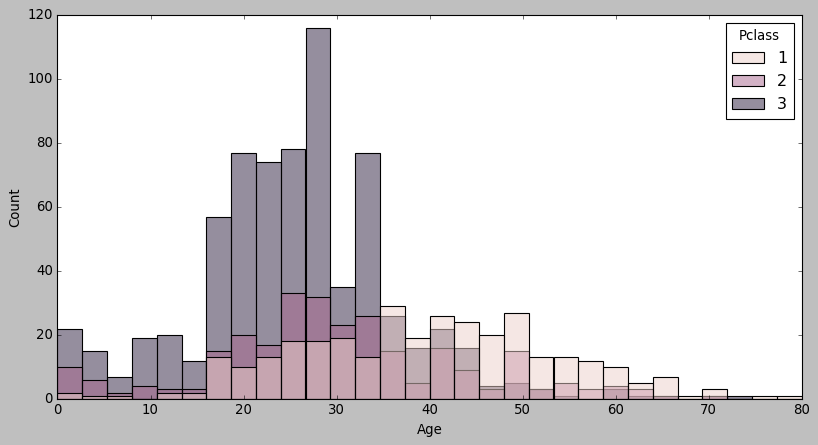

In [25]:
f, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=titanic, x="Age", hue="Pclass");

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
Most of the total of people travelled in third class. 
Older people travelled in first and second class, and younger people (less than 30 years) traveled in thrid class
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

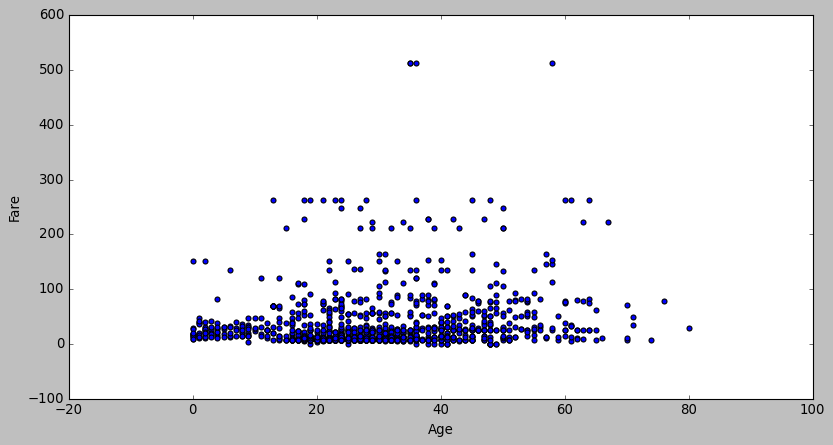

In [26]:
# Method 1 - matplotlib
f, axe = plt.subplots(figsize = (12, 6))
titanic.plot(kind = 'scatter', x = 'Age', y = 'Fare', ax = axe);

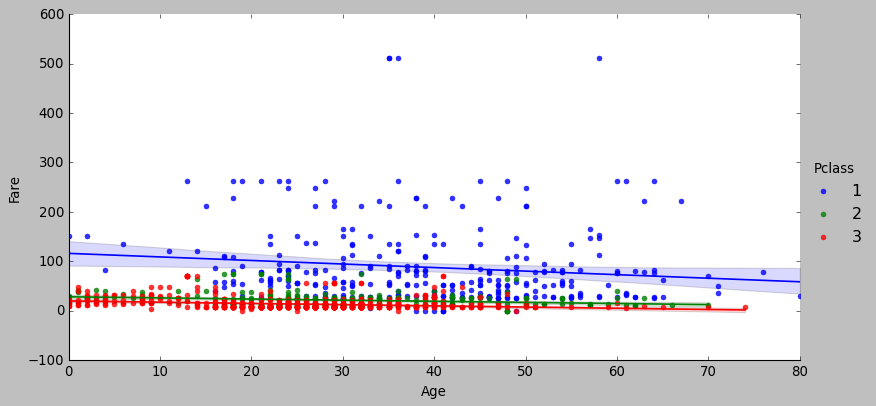

In [27]:
# Method 2 - seaborn
sns.lmplot(data=titanic,x="Age", y="Fare", hue="Pclass", height= 5, aspect= 2);

#### Plot the correlation matrix using seaborn.

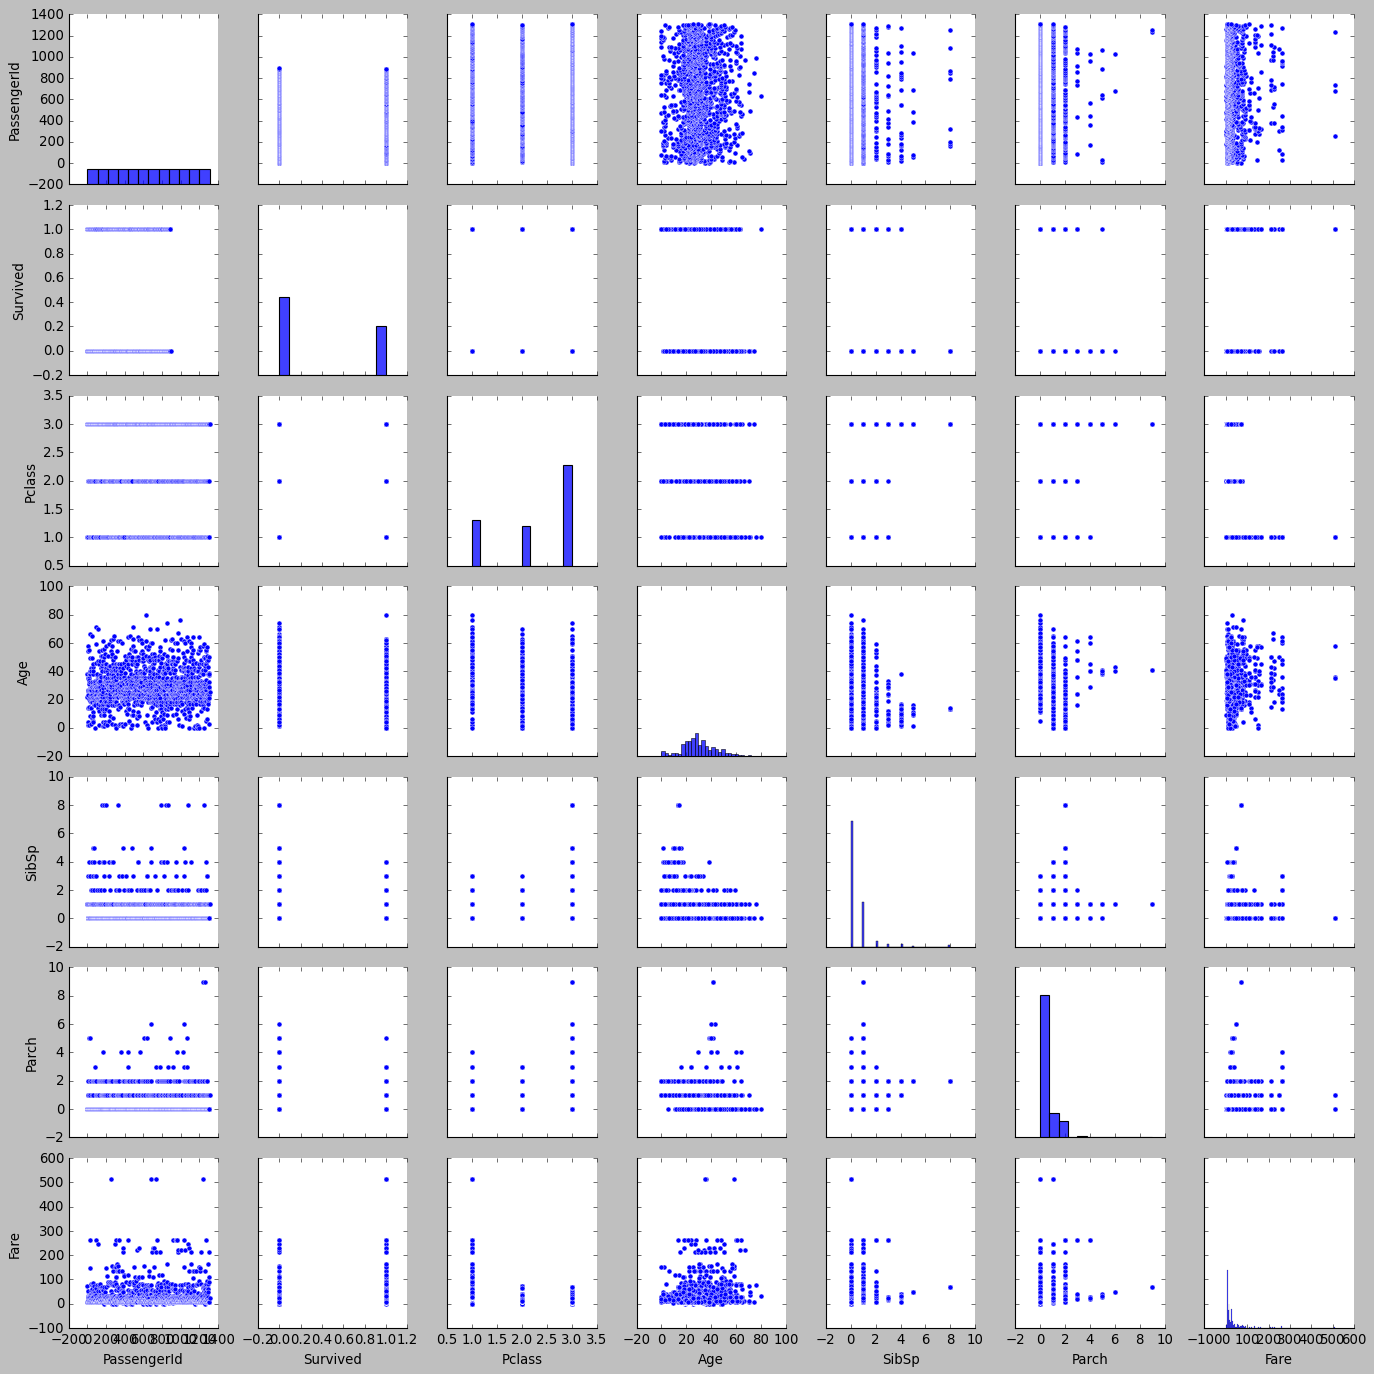

In [28]:
sns.pairplot(titanic);

#### What are the most correlated features?

In [ ]:
"""
No clear correlation found :-(
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

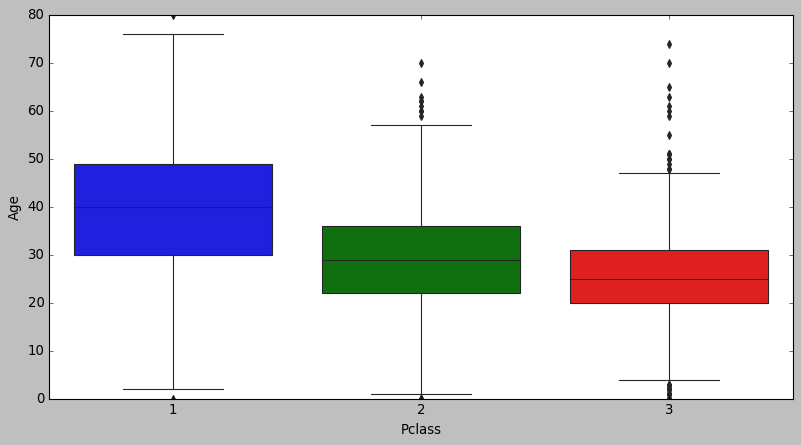

In [29]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x="Pclass", y="Age", data=titanic);

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

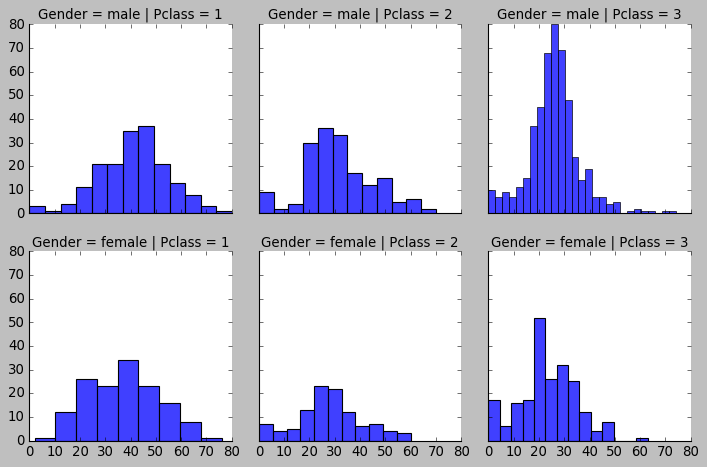

In [30]:
g = sns.FacetGrid(titanic, col="Pclass",  row="Gender")
g.map_dataframe(sns.histplot, x="Age")